In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("/content/Online Retail.csv")
pd.set_option('expand_frame_repr', False)
print(data.head(20))

   InvoiceNo StockCode                          Description  Quantity     InvoiceDate  UnitPrice  CustomerID         Country
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55     17850.0  United Kingdom
1     536365     71053                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39     17850.0  United Kingdom
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75     17850.0  United Kingdom
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39     17850.0  United Kingdom
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39     17850.0  United Kingdom
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2  12/1/2010 8:26       7.65     17850.0  United Kingdom
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6  12/1/2010 8:26       4.25     17850.0  United Kingdom


In [3]:
data.shape


(541909, 8)

In [4]:
#Find Null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Handling Missing Values
data.dropna(subset=["CustomerID"], inplace=True)
print(data['CustomerID'])

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 406829, dtype: float64


In [6]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
# Data Types
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])


In [8]:
# Duplicates
data.drop_duplicates(inplace=True)

In [9]:
# Data Range (assuming Quantity and UnitPrice shouldn't be negative)
data = data[(data["Quantity"] >= 0) & (data["UnitPrice"] >= 0)]

In [10]:
# Descriptive Statistics
summary_stats = data[["Quantity", "UnitPrice"]].describe()
print(summary_stats)

            Quantity      UnitPrice
count  392732.000000  392732.000000
mean       13.153718       3.125596
std       181.588420      22.240725
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


In [11]:
# Time Analysis
data["Year"] = data["InvoiceDate"].dt.year
yearly_trends = data.groupby("Year")["Quantity"].sum()
print(yearly_trends)

Year
2010     311063
2011    4854823
Name: Quantity, dtype: int64


In [12]:
# Country Analysis
country_revenue = data.groupby("Country")["UnitPrice"].sum()
print(country_revenue)

Country
Australia                  3605.750
Austria                    1693.900
Bahrain                      78.950
Belgium                    7372.850
Brazil                      142.600
Canada                      910.580
Channel Islands            3388.000
Cyprus                     3466.150
Czech Republic               78.270
Denmark                    1195.550
EIRE                      32134.960
European Community          289.800
Finland                    3628.440
France                    36788.980
Germany                   33499.580
Greece                      663.290
Iceland                     481.210
Israel                      898.590
Italy                      3576.210
Japan                       657.210
Lebanon                     242.440
Lithuania                    99.440
Malta                       545.190
Netherlands                6247.730
Norway                     5662.470
Poland                     1377.210
Portugal                   8636.430
RSA                 

In [13]:
# Customer Segmentation (using KMeans as an example)
from sklearn.cluster import KMeans

X = data[["Quantity", "UnitPrice"]]
kmeans = KMeans(n_clusters=3)
data["Cluster"] = kmeans.fit_predict(X)
print(data['Cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0         0
1         0
2         0
3         0
4         0
         ..
541904    0
541905    0
541906    0
541907    0
541908    0
Name: Cluster, Length: 392732, dtype: int32


In [14]:
# Calculate the total number of unique stocks
total_unique_stocks = data["StockCode"].nunique()

# Print the total number of unique stocks
print("Total number of unique stocks:", total_unique_stocks)

Total number of unique stocks: 3665


In [15]:
#value_counts of each stocks
print(data["StockCode"].value_counts())

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
20678        1
90059D       1
90168        1
90169        1
23843        1
Name: StockCode, Length: 3665, dtype: int64


In [16]:
# Top Selling Items
print(data["StockCode"].value_counts().head(10))


85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
Name: StockCode, dtype: int64


In [17]:
# Customer Behavior
avg_purchase_size = data.groupby("CustomerID")["Quantity"].mean()
print(avg_purchase_size)

CustomerID
12346.0    74215.000000
12347.0       13.505495
12348.0       75.516129
12349.0        8.643836
12350.0       11.588235
               ...     
18280.0        4.500000
18281.0        7.714286
18282.0        8.583333
18283.0        1.882108
18287.0       22.657143
Name: Quantity, Length: 4339, dtype: float64


In [18]:
# Revenue Distribution
revenue_by_country = data.groupby("Country")["UnitPrice"].sum()

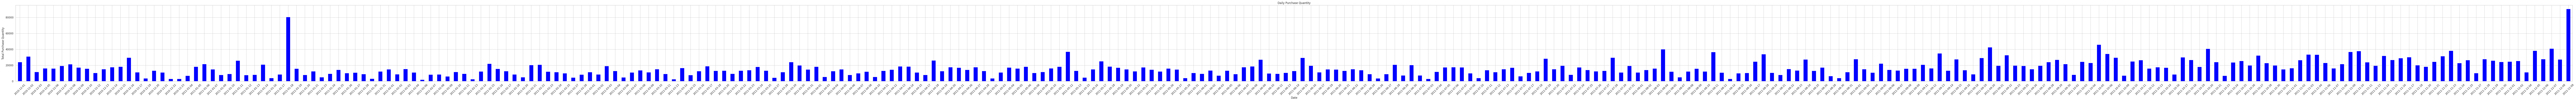

In [33]:
# Convert "InvoiceDate" to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Group data by date and calculate total purchase quantity for each date
daily_purchase = data.groupby(data["InvoiceDate"].dt.date)["Quantity"].sum()

# Create a bar plot for daily purchase quantity
plt.figure(figsize=(200, 6))
daily_purchase.plot(kind="bar", color="blue")
plt.title("Daily Purchase Quantity")
plt.xlabel("Date")
plt.ylabel("Total Purchase Quantity")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
# Seasonal Trends
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()
print(monthly_sales)


InvoiceDate
2010-12    311063
2011-01    348522
2011-02    265043
2011-03    347623
2011-04    291369
2011-05    372948
2011-06    363014
2011-07    367372
2011-08    398190
2011-09    543654
2011-10    591551
2011-11    678760
2011-12    286777
Freq: M, Name: Quantity, dtype: int64


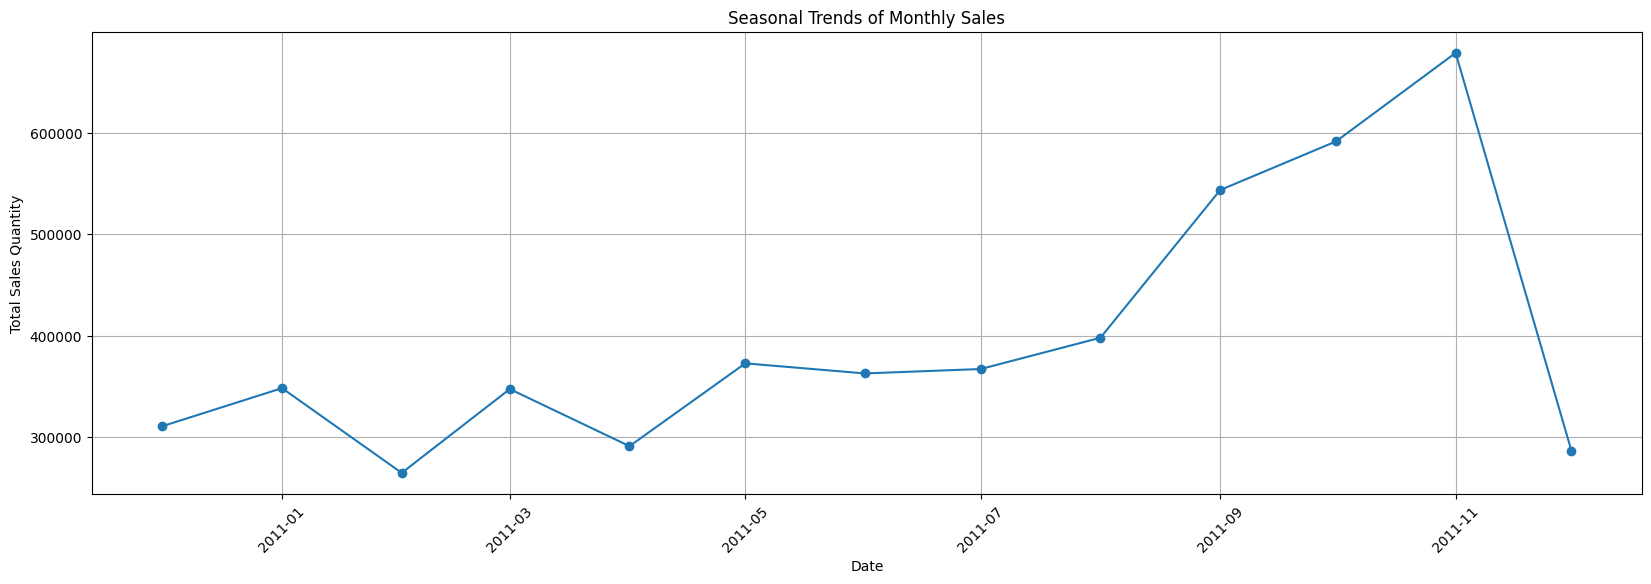

In [21]:
# Convert the index of monthly_sales to datetime format for better x-axis representation
monthly_sales.index = monthly_sales.index.to_timestamp()

# Create a line plot for seasonal trends
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Seasonal Trends of Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales Quantity")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

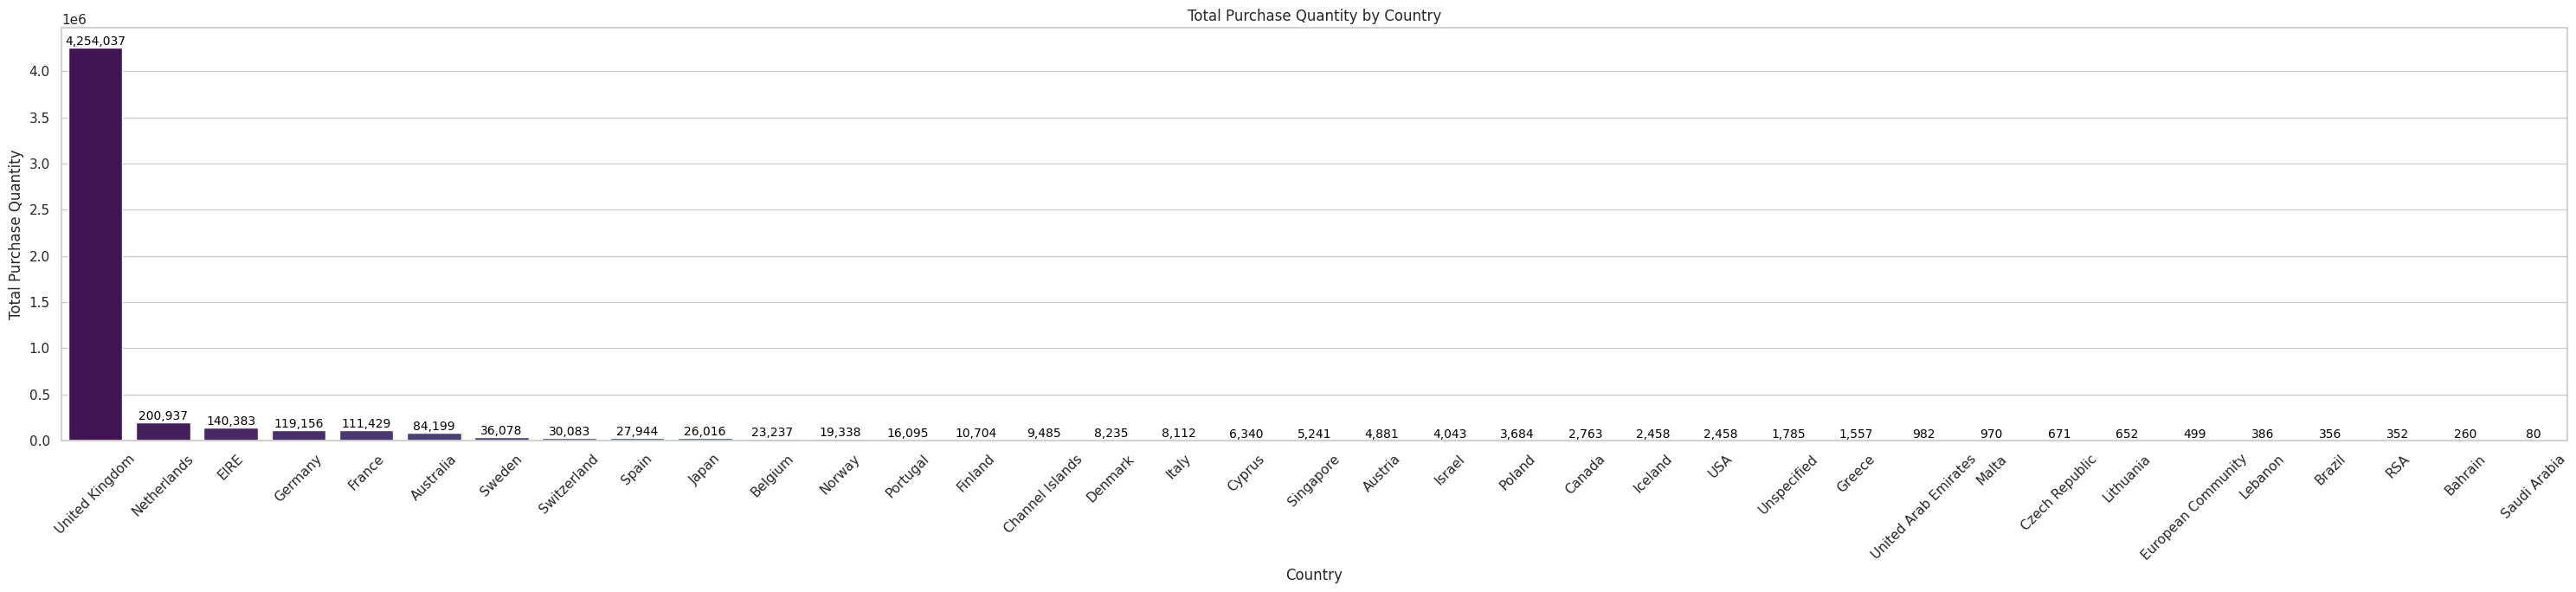

In [22]:
# Convert "InvoiceDate" to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Group data by country and calculate total purchase quantity for each country
country_total_purchase = data.groupby("Country")["Quantity"].sum().reset_index()

# Sort countries by total purchase quantity in descending order
country_total_purchase = country_total_purchase.sort_values(by="Quantity", ascending=False)

# Set the style using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(30, 7))

# Create a bar chart for total purchase quantity by country
ax = sns.barplot(data=country_total_purchase, x="Country", y="Quantity", palette="viridis")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set plot labels and title
plt.title("Total Purchase Quantity by Country")
plt.xlabel("Country")
plt.ylabel("Total Purchase Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Calculate CLV
data["TotalPurchase"] = data["Quantity"] * data["UnitPrice"]
clv_per_customer = data.groupby("CustomerID")["TotalPurchase"].sum()
print(clv_per_customer)

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: TotalPurchase, Length: 4339, dtype: float64


In [24]:
# Revenue Contribution by Product Categories
data["ProductCategory"] = data["Description"].apply(lambda x: x.split()[0])
revenue_by_category = data.groupby("ProductCategory")["UnitPrice"].sum()
print(revenue_by_category)

ProductCategory
10                212.01
12               2861.14
15                 20.65
15CM             1678.20
16                735.85
                  ...   
YELLOW/ORANGE       0.58
YELLOW/PINK         7.41
YOU'RE            581.88
YULETIDE           69.25
ZINC             4801.51
Name: UnitPrice, Length: 821, dtype: float64


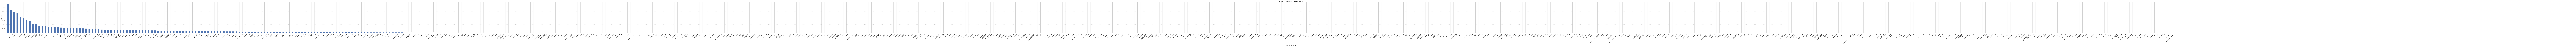

In [25]:
#Revenue Contribution by Product Categories:
plt.figure(figsize=(500, 6))
revenue_by_category.sort_values(ascending=False).plot(kind="bar")
plt.title("Revenue Contribution by Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


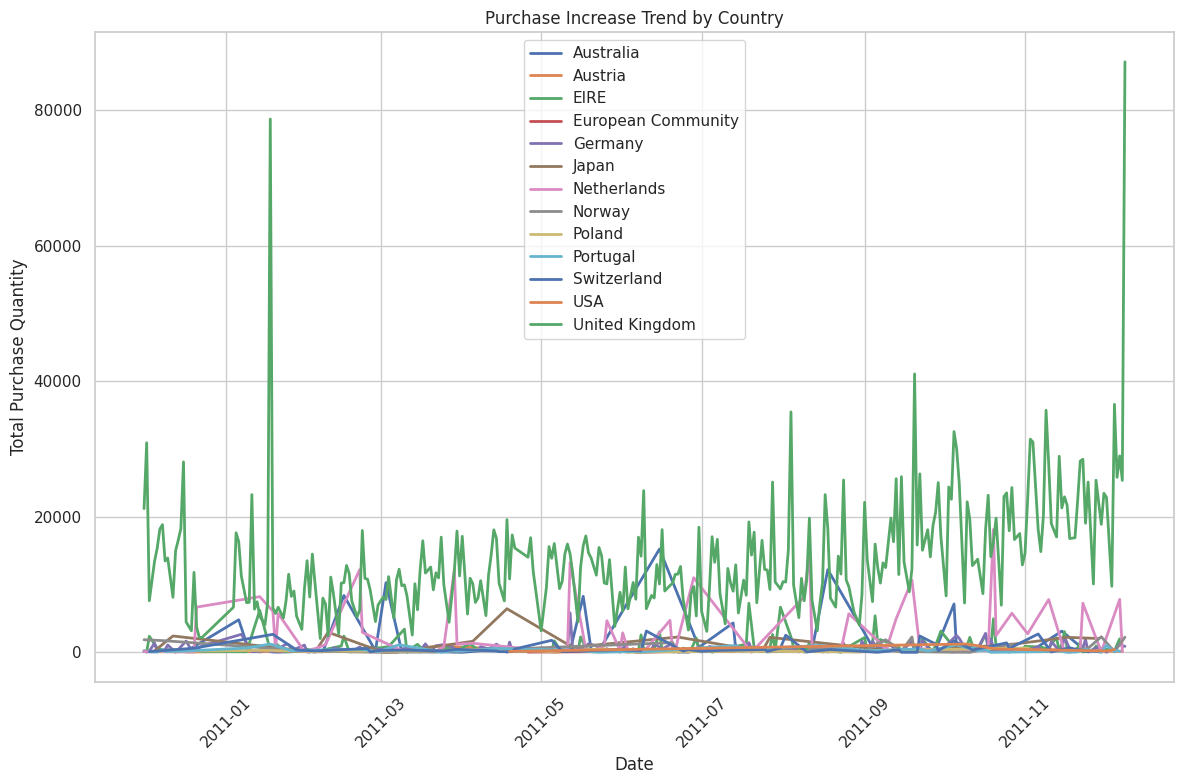

Countries with increasing purchase trend: ['Australia', 'Austria', 'EIRE', 'European Community', 'Germany', 'Japan', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Switzerland', 'USA', 'United Kingdom']


In [32]:
# Convert "InvoiceDate" to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Group data by country and date, and calculate total purchase quantity for each date and country
country_daily_purchase = data.groupby(["Country", data["InvoiceDate"].dt.date])["Quantity"].sum().reset_index()

# Set the style using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create line plots for countries with increasing purchase trend
increasing_countries = []

for country in country_daily_purchase["Country"].unique():
    country_data = country_daily_purchase[country_daily_purchase["Country"] == country]

    # Check if purchase trend is increasing
    if country_data["Quantity"].diff().mean() > 0:
        increasing_countries.append(country)
        plt.plot(country_data["InvoiceDate"], country_data["Quantity"], label=country, linewidth = 2)

plt.title("Purchase Increase Trend by Country")
plt.xlabel("Date")
plt.ylabel("Total Purchase Quantity")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("Countries with increasing purchase trend:", increasing_countries)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


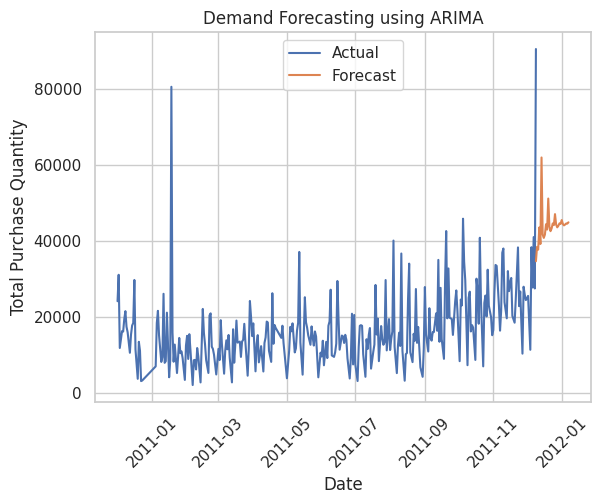

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Group data by date and calculate total purchase quantity for each date
daily_purchase = data.groupby(data["InvoiceDate"].dt.date)["Quantity"].sum()

# Fit ARIMA model
model = ARIMA(daily_purchase, order=(5,1,0))
model_fit = model.fit()

# Forecast future demand
forecast_steps = 30  # Forecasting 30 days ahead
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.plot(daily_purchase.index, daily_purchase.values, label='Actual')
plt.plot(pd.date_range(start=daily_purchase.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast')
plt.title("Demand Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Total Purchase Quantity")
plt.xticks(rotation=45)
plt.legend()
plt.show()